# I - Préparation du DataFrame

### 1 - Import des bibilothèques

In [26]:
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### 2 - Import des données dans un DataFrame

In [27]:
df = pd.read_csv(r'C:\Users\capit\OneDrive\Bureau\Demoday Essential Git\Life Expectancy Data.csv')

### 3 - Connaitre son DataFrame

In [28]:
# Le nombre de lignes et de colonnes
print('Le nombre de lignes, colonnes est de ', format(df.shape))

Le nombre de lignes, colonnes est de  (2938, 22)


In [29]:
# Les premières lignes du DataFrame
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
# Le nombre de lignes vides par colonnes
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [31]:
# affiche les différents indicateurs

## Sur la totalité du DataFrame 
df.describe(include='all')

## Ou sur une colonne en particulier
df['Life expectancy '].describe()


count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

### 4 - Modifications des Données

#### 4.1 -  Modifications

In [32]:
# Suppression de colonnes

## Suppression de la colonne 'Population'
df=df.drop('Population',1) # le 1 correspond à la selection de la colonne complète

C:\Users\capit\AppData\Local\Temp\ipykernel_7240\627739513.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Population',1) # le 1 correspond à la selection de la colonne complète


In [33]:
# Modifications des lignes vides

## Modification des lignes vides par la valeur de la médiane regroupée par Pays
for i in df.columns[4:-1]:
    df[i] = df.groupby('Country')[i].fillna(df.groupby('Country')[i].transform('median'))

In [34]:
# Modifications des valeurs extrêmes ou abhérantes

## Modification par la valeur de la médiane si la valeur cible est écartée de + ou - 3 sigma

# Parcourt toutes les colonnes à partir de la quatrième colonne
for col in df.columns[4:-1]:
    # Calcule la médiane et l'écart type de chaque groupe par pays
    group_stats = df.groupby('Country')[col].agg(['median', 'std'])

    # Parcourt chaque groupe par pays
    for country, stats in group_stats.iterrows():
        # Récupère la médiane et l'écart type pour le pays courant
        median = stats['median']
        std = stats['std']

        # Remplace les valeurs à plus de 3 sigma de la médiane par la médiane (ou moins de 3 sigma)
        mask = (df['Country'] == country) & ((df[col] > median + 3 * std)  | (df[col] < median - 3 * std))
        df.loc[mask, col] = median

# Version de Valentin --> équivalente
"""
for i in df.columns[4:]:
    country_group = df.groupby('Country')
    median = country_group[i].transform('median')
    std = country_group[i].transform('std')
    lower_bound = median - 3 * std
    upper_bound = median + 3 * std
    df.loc[(df[i] < lower_bound) | (df[i] > upper_bound), i] = median
"""

"\nfor i in df.columns[4:]:\n    country_group = df.groupby('Country')\n    median = country_group[i].transform('median')\n    std = country_group[i].transform('std')\n    lower_bound = median - 3 * std\n    upper_bound = median + 3 * std\n    df.loc[(df[i] < lower_bound) | (df[i] > upper_bound), i] = median\n"

In [35]:
# Suppression des lignes vides

# Suppression des lignes où il y a une données manquante
df=df.dropna(axis=0) # le 0 correspond à la sélection de la ligne complète

In [36]:
# Ajout de colonnes

## Rajout d'une colonne avec la catégorie 'Life expectancy categories'

### Valeurs de séparation des classes avec les Labels correspondants
### -->  36 < 'Faible' < 66 < 'Moyen' < 74 < 'Elevé < 90
### Les valeurs sont issues de la colonne 'Life expectancy '
bins = [36, 66, 74, 90]
labels = ['Faible', 'Moyen', 'Elevé']
df['Life expectancy categories'] = pd.cut(df['Life expectancy '], bins=bins, labels=labels)

# Vérification sur les 5 premières lignes
df.head(5)
# Ou sur une variable en particulier
df.loc[df['Country']=='France']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy categories
930,France,2015,Developing,82.4,78.0,3.0,12.20,0.000000,86.0,157.0,...,98.0,9.77,98.0,0.1,36526.77110,0.7,0.6,0.894,16.3,Elevé
931,France,2014,Developing,82.2,79.0,3.0,11.50,6739.677606,83.0,267.0,...,98.0,11.54,98.0,0.1,42955.24287,0.6,0.6,0.890,16.2,Elevé
932,France,2013,Developing,82.0,81.0,3.0,11.10,6646.953935,74.0,272.0,...,99.0,11.56,99.0,0.1,42554.12250,0.6,0.6,0.887,16.2,Elevé
933,France,2012,Developing,81.5,83.0,3.0,11.50,751.379355,78.0,0.0,...,99.0,11.44,99.0,0.1,4838.24440,0.6,0.6,0.885,16.1,Elevé
934,France,2011,Developing,81.7,83.0,3.0,11.80,683.919057,74.0,269.5,...,99.0,11.33,99.0,0.1,4381.28800,0.6,0.6,0.882,16.1,Elevé
935,France,2010,Developing,81.3,86.0,3.0,11.70,72.800121,65.0,5048.0,...,99.0,11.20,99.0,0.1,473.34279,0.6,0.6,0.879,16.0,Elevé
936,France,2009,Developing,81.1,88.0,3.0,11.80,6415.357350,51.0,1541.0,...,98.0,11.28,98.0,0.1,41631.13141,0.6,0.6,0.879,16.0,Elevé
937,France,2008,Developing,89.0,88.0,3.0,11.90,7002.785925,47.0,604.0,...,98.0,1.57,98.0,0.1,45413.65710,0.6,0.6,0.877,16.1,Elevé
938,France,2007,Developing,89.0,89.0,3.0,12.20,64.737149,42.0,39.0,...,99.0,1.45,98.0,0.1,416.58397,0.6,0.6,0.873,16.1,Elevé
939,France,2006,Developing,86.0,92.0,3.0,12.40,5689.991931,39.0,40.0,...,99.0,1.53,99.0,0.1,36544.58530,0.6,0.6,0.870,16.1,Elevé


#### 4.2 -  Contrôle

In [37]:
# Vérification du nombre de cellules vides par colonnes
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy categories         0
dtype: int64

# II - Préparation de l'Analyse

### 1 - Prétraitement

In [38]:
# Récupération des noms des colonnes afin de les copier/coller pour la suite
## Permet de voir si il y a des 'espaces' parasites ...
print("Ensemble colonnes existantes :")
df.columns[:]

Ensemble colonnes existantes :


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy categories'],
      dtype='object')

In [39]:
# Séparation du Dataset en deux parties
## Les colonnes de caractéristiques : 'X'
## La colonne de données que l'on veut prédire : 'y' 

print("Séparation des Données cibles / Caractéristiques...")

## Choisissez les colonnes que vous voulez en caractéristiques
features_list=['Adult Mortality',#
               #'infant deaths',
               'Alcohol',#
               'percentage expenditure',#
               'Hepatitis B',#
               'Measles ',#
               ' BMI ',#
               'under-five deaths ',#
               'Polio',#
               'Total expenditure',#
               'Diphtheria ',#
               ' HIV/AIDS',#
               'GDP',#
               ' thinness  1-19 years',#
               ' thinness 5-9 years',#
               'Income composition of resources',#
               'Schooling'#
               ]

X = df.loc[:,features_list] # Nous ajoutons la liste 'features_list' à notre 'loc' 
y = df.loc[:,'Life expectancy categories'] # Nous définissons  '---' comme étant la variable cible (celle à prédire)

print("...Fait.")
print()

Séparation des Données cibles / Caractéristiques...
...Fait.



In [40]:
# Séparation en deux Dataset : Entrainement ('Train') & Test ('Test')
print("Séparation du Dataset en un set d'entrainement et un set de test...")

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,  # ici le set de test fait 20 % du Total
                                                    random_state=0, # une séquence de nombre aléatoire (mais reproductible) 
                                                    stratify=y)     # OBLIGATOIRE si il y a une classification en 'y'
                                                                    # Permet d'avoir la même proportion de chaque classe
                                                                    # dans le train_set et le test_set

print("...Fait.") 

Séparation du Dataset en un set d'entrainement et un set de test...
...Fait.


In [41]:
# Encodage des données catégorielles & Normalisation des données numériques
# !!! LES NOMS DES COLONNES NE PORTENT SUR LE JEU DE DONNEES 'X_train' !!!

#print("#### X_train AVANT le prétraitement ####")
#print(X_train.head(5))

print("Encodage des données catégorielles & Normalisation des données numériques...")
print()
## StandardScaler pour normaliser les données(i.e appliquer Z-score)
## OneHotEncoder pour encoder les données catégorielles

# Partie données Numériques 
numeric_features = features_list
numeric_transformer = StandardScaler()

# Partie données catégorielles
# categorical_features = df.loc[:,'Life expectancy categories']
# categorical_transformer = OneHotEncoder()


# Utilisation de ColumnTransformer pour appliquer le prétraitement ci-dessus 
feature_encoder = ColumnTransformer(
    transformers=[
        #('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
)
X_train = feature_encoder.fit_transform(X_train)
print("...Fait.")

#print("#### X_train APRES le prétraitement ####")
#print(X_train[0:5,:]) # Affiche les 5 premières lignes (not using iloc since now y_train became a numpy array)

Encodage des données catégorielles & Normalisation des données numériques...

...Fait.


### 2 - Construction du modèle

Il existe plusieurs types de modèles d'entrainement:
- regressor = LinearRegression()            --> 'Régression Linéaire Simple'
- classifier = LogisticRegression()         --> 'Régression Minéaire Multiple'  
- classifier = DecisionTreeClassifier       --> 'Arbre de Décision'  
- classifier = RandomForestClassifier         --> 'Forêt aléatoire'

In [42]:
# Création du modèle d'entrainement

print("Création du modèle d'entrainement...")
classifier = LogisticRegression() # type du Modèle d'entrainement
classifier.fit(X_train, y_train) # Cette étape EST l'entrainement ! (grâce au .fit)
print("...Fait.")

Création du modèle d'entrainement...
...Fait.


In [43]:
# Test du modèle d'entrainement

print("Prédictions sur le set d'entrainement...")
y_train_pred = classifier.predict(X_train)
print("...Fait.")
print()
print(y_train_pred[:5]) # sort les 5 premières lignes  (not using iloc since now y_train became a numpy array)

Prédictions sur le set d'entrainement...
...Fait.

['Elevé' 'Elevé' 'Faible' 'Moyen' 'Moyen']


In [44]:
### Lancement du Test ###

print("--- Lancement du Test ---")
print()

# Préparation des données de tests
# Standardizing numeric features
print("Normalisation des données numériques...")
#print(X_test)
#print()

X_test = feature_encoder.transform(X_test)

print("...Fait.")
#print(X_test[:5]) # sort les 5 premières lignes  (not using iloc since now y_train became a numpy array)
#print()

--- Lancement du Test ---

Normalisation des données numériques...
...Fait.


In [45]:
# Prédictions sur le set de test
print("Prédictions sur le set de test...")
y_test_pred = classifier.predict(X_test)
print("...Fait.")
print()
print(y_test_pred[:5]) # sort les 5 premières lignes  (not using iloc since now y_train became a numpy array)

Prédictions sur le set de test...
...Fait.

['Moyen' 'Faible' 'Elevé' 'Elevé' 'Moyen']


### 3 - Évaluation de la performance du modèle

In [46]:
# Évaluation de la performance
print("--- Évaluation de la performance du modèle ---")
print()
# Scores R^2
print("R2 score on train set : ", classifier.score(X_train, y_train))
print("R2 score on test set : ", classifier.score(X_test, y_test))
print()
print('R^2_train - R^2_test =',format(classifier.score(X_train, y_train)-classifier.score(X_test, y_test)))
print()
print("Si R^2 est proche de 1   --> 'Bonnes performances du modèle'")
print("Si R^2_train > R^2_test  --> 'Sur-ajustement ou overfiting'")
print("Si R^2_train < R^2_test  --> 'Sous-ajustement ou underfiting'")

--- Évaluation de la performance du modèle ---

R2 score on train set :  0.8032961190855927
R2 score on test set :  0.8046709129511678

R^2_train - R^2_test = -0.0013747938655750414

Si R^2 est proche de 1   --> 'Bonnes performances du modèle'
Si R^2_train > R^2_test  --> 'Sur-ajustement ou overfiting'
Si R^2_train < R^2_test  --> 'Sous-ajustement ou underfiting'


#### Dans le cas d'une classification  
  
Dans le cas d'une classification nous pouvons créer des Matrices de confusions afin de mieux visualiser les résultats

--- Évaluation de la performance du modèle ---
----------- Matrices de confusions -----------


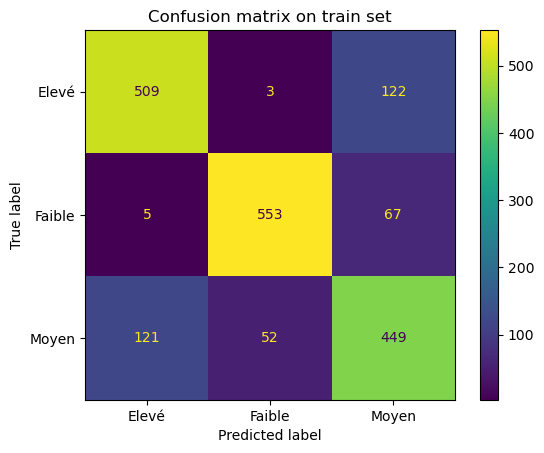

précision du score sur l'ensemble d'entrainement' :  0.8032961190855927


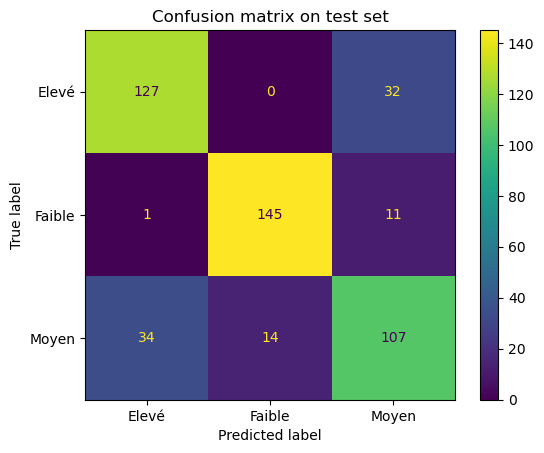

précision du score sur l'ensemble de test :  0.8046709129511678


In [47]:
### Évaluation de la performance ###
print("--- Évaluation de la performance du modèle ---")
print("----------- Matrices de confusions -----------")



# Plot confusion matrix
train_cm = ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train)
plt.title("Confusion matrix on train set")
plt.show()
print("précision du score sur l'ensemble d'entrainement' : ", classifier.score(X_train, y_train))

test_cm = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Confusion matrix on test set")
plt.show()
print("précision du score sur l'ensemble de test : ", classifier.score(X_test, y_test))

### 4 - Importance des données

In [48]:
# Récupération des coefficients et des constantes de la fonction de décision du modèle
print("Les coefficients sont : ", classifier.coef_) 
print("La constante est: ", classifier.intercept_)

Les coefficients sont :  [[-1.28492561  0.03641313  1.13843407  0.01661324  0.25213351  0.08793802
  -0.4516387   0.11541091  0.36183253  0.22267234 -2.32149468  0.88411499
   0.41278619 -0.61789422  0.81328291  0.69309865]
 [ 1.0987066  -0.03035322 -1.64138022  0.06653624 -0.19157323 -0.22108031
   0.30179538 -0.12500074 -0.27038896 -0.29565484  3.48936103 -1.43490557
  -0.08701008  0.25524708 -0.67738477 -0.68174599]
 [ 0.18621901 -0.00605992  0.50294616 -0.08314948 -0.06056028  0.13314228
   0.14984333  0.00958982 -0.09144358  0.0729825  -1.16786634  0.55079058
  -0.3257761   0.36264714 -0.13589815 -0.01135266]]
La constante est:  [-0.74028159 -0.4838812   1.22416279]


In [49]:
# Pour faciliter l'interprétation nous pouvons aussi  faire la _
# création d'un DataFrame avec les noms de colonnes et les coefficients:
coef_df = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients": classifier.coef_[0]
})

# Tri des coefficients par ordre décroissant
coef_df = coef_df.sort_values(by="coefficients", ascending=False)
# Affichage du DataFrame des coefficients
print(coef_df)

                      feature_names  coefficients
2            percentage expenditure      1.138434
11                              GDP      0.884115
14  Income composition of resources      0.813283
15                        Schooling      0.693099
12             thinness  1-19 years      0.412786
8                 Total expenditure      0.361833
4                          Measles       0.252134
9                       Diphtheria       0.222672
7                             Polio      0.115411
5                              BMI       0.087938
1                           Alcohol      0.036413
3                       Hepatitis B      0.016613
6                under-five deaths      -0.451639
13               thinness 5-9 years     -0.617894
0                   Adult Mortality     -1.284926
10                         HIV/AIDS     -2.321495


<function matplotlib.pyplot.show(close=None, block=None)>

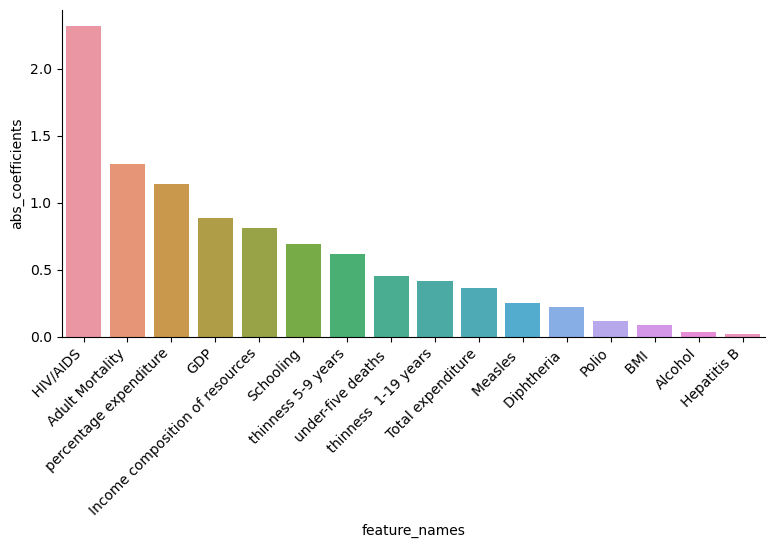

In [50]:
# Met les coefficients en valeur absolue pour ranger les données
coef_df['abs_coefficients'] = np.abs(coef_df['coefficients'])

# Visualisation du rang des caractéristiques avec seaborn
g = sns.catplot(x="feature_names", 
            y="abs_coefficients", 
            data=coef_df.sort_values(by="abs_coefficients", ascending=False), 
            kind="bar",
            height= 4,
            aspect=2) # Redimentionne le graph (2* plus large que haut)

g.ax.set_xticklabels(g.ax.get_xticklabels(), rotation=45, ha='right')

plt.show